In [ ]:
#@title 

%%HTML
<div style="text-align:center; display:flex; justify-content:space-between;">
<div style="background-color:white; width:25%; height:150px; display: flex;">

<img src="https://giecaruff.github.io/sites/gss_semana_2020/logos/GSS_semana_geofisica.png" height="40%">

</div>
<div style="background-color:white; width:50%; height:150px; text-align:center;">

<br><br>

<span style="color:purple; font-size: 16pt;"> Minicurso Python Para Geofísicos <br></span>
<span style="color:purple; font-size: 25pt;font-weight: bold;">Separação Regional-Residual de dados Potenciais </span>

</div>

<div style="background-color:white; width:25%; height:150px; text-align:right">
<img src="https://giecaruff.github.io/sites/gss_semana_2020/logos/logo_colorida_icone.png" height="60%">
</div>
</div>

<div style="background-color:white">
<center><span style="color:purple; font-size: 25pt;font-weight: bold;center">Equipe:</span>
<br><br>

<div style="background-color:white;width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Fernando Vizeu</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/vizeu.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">fvizeus@gmail.com</span> </div>
<div style="background-color:white;width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Mário Martins</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/mario_machine.png" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">mario_martins@id.uff.br</span> </div>
<div style="background-color:white;width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Rodrigo Mota</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/rodrigo_dutra.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">dutrarodrigo@id.uff.br</span> </div>
<div style="background-color:white;width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Rodrigo Bijani</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/rodrigo_bijani.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">rodrigobijani@id.uff.br</span> </div>

</div>

## Problema: Separação regional-residual de dados potenciais (gravimétricos) <br>
###  Neste exercício, vamos separar diferentes "frequências" de um dado sintético de gravidade. Como sabemos, uma medida de campo potencial respeita o principio da superposição, ou seja, ao medir gravidade, por exemplo, o cidadão mede os efeitos produzidos por todas as fontes interferentes na região. <br> 
###  Em alguns casos, algumas dessas fontes não são objeto de estudo e, portanto, devem ser descontadas do dado original. <br>
### Surge então o conceito de separação regional-residual. Neste caso, o dado de origem "regional" precisa ser destacado do "completo" a fim de realçar o dado "residual". <br> 
###  Existem diversos métodos para fazer esta separação. Vamos aqui utilizar o ajuste polinomial. Vamos ver ao longo do script o procedimento. 

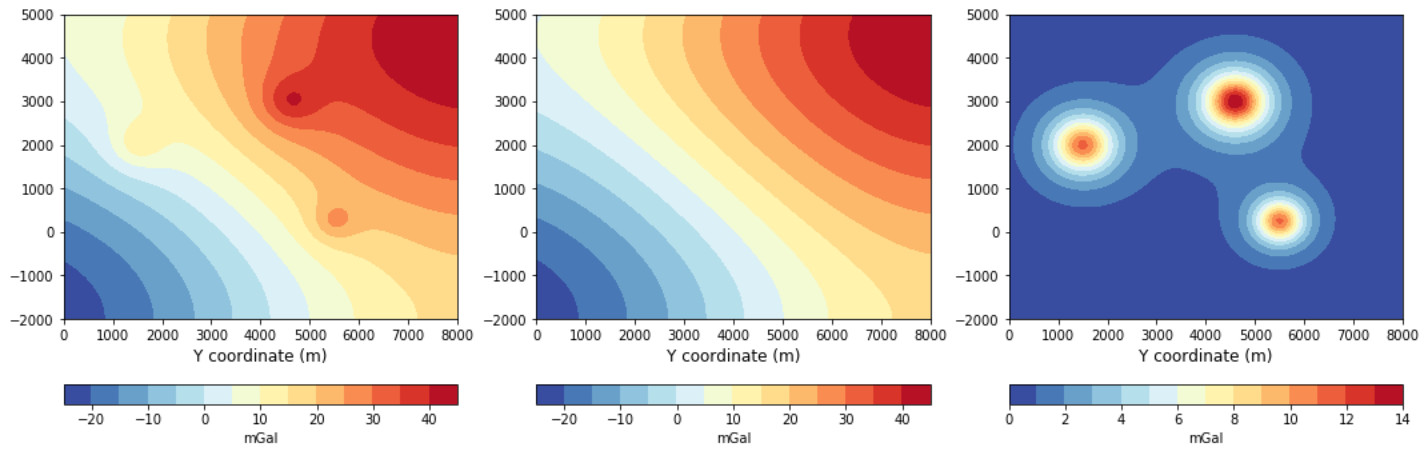

### <center> Etapa 00: Importar as bibliotecas necessárias para realizar a atividade.

In [ ]:
# Import das bibliotecas necessarias:
import numpy as np                  # biblioteca de atributos numericos do python
import matplotlib.pyplot as plt     # biblioteca para graficos 2D
import pandas as pd                 # biblioteca para leitura de dados tabulados

### <center> Etapa 01: Utilização do Pandas para a leitura da anomalia gravimétrica (mGal), cujo arquivo está no diretório dados: <cente>

In [ ]:
# Codigo baseado nas concepções do google colab:
!mkdir -p dados # criacao do diretorio dados
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1KfWs-XhYTfClMG_hiKMQy2JgWlgpThs0' -O dados/observed.txt

--2020-09-05 21:20:38--  https://docs.google.com/uc?export=download&id=1KfWs-XhYTfClMG_hiKMQy2JgWlgpThs0
Resolving docs.google.com (docs.google.com)... 64.233.188.100, 64.233.188.101, 64.233.188.113, ...
Connecting to docs.google.com (docs.google.com)|64.233.188.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-8c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/abfmh9dm3mcgaopmp01l1g9ag478rj05/1599340800000/14579245554516633897/*/1KfWs-XhYTfClMG_hiKMQy2JgWlgpThs0?e=download [following]
--2020-09-05 21:20:38--  https://doc-0k-8c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/abfmh9dm3mcgaopmp01l1g9ag478rj05/1599340800000/14579245554516633897/*/1KfWs-XhYTfClMG_hiKMQy2JgWlgpThs0?e=download
Resolving doc-0k-8c-docs.googleusercontent.com (doc-0k-8c-docs.googleusercontent.com)... 74.125.23.132, 2404:6800:4008:c02::84
Connecting to doc-0k-8c-docs.googleusercontent.com (doc-0k-8c-do

In [ ]:
# Leitura dos dados via pandas:
nomes = ['x', 'y', 'grav_anom'] # cabecalho do dataframe do pandas
data = pd.read_csv('dados/observed.txt', sep=';', header=1, names=nomes)

In [ ]:
# verificar se o dado foi lido corretamente:
data

,x,y,grav_anom
0,0.0,-2000.000,-15.070
1,0.0,-1905.405,-15.071
2,0.0,-1810.811,-15.047
3,0.0,-1716.216,-15.000
4,0.0,-1621.622,-14.930
...,...,...,...
7495,8000.0,4621.622,30.375
7496,8000.0,4716.216,30.336
7497,8000.0,4810.811,30.270
7498,8000.0,4905.405,30.179




## Etapa 02: Visualização dos dados utilizando a função scatter do matplotlib.pyplot : <center>

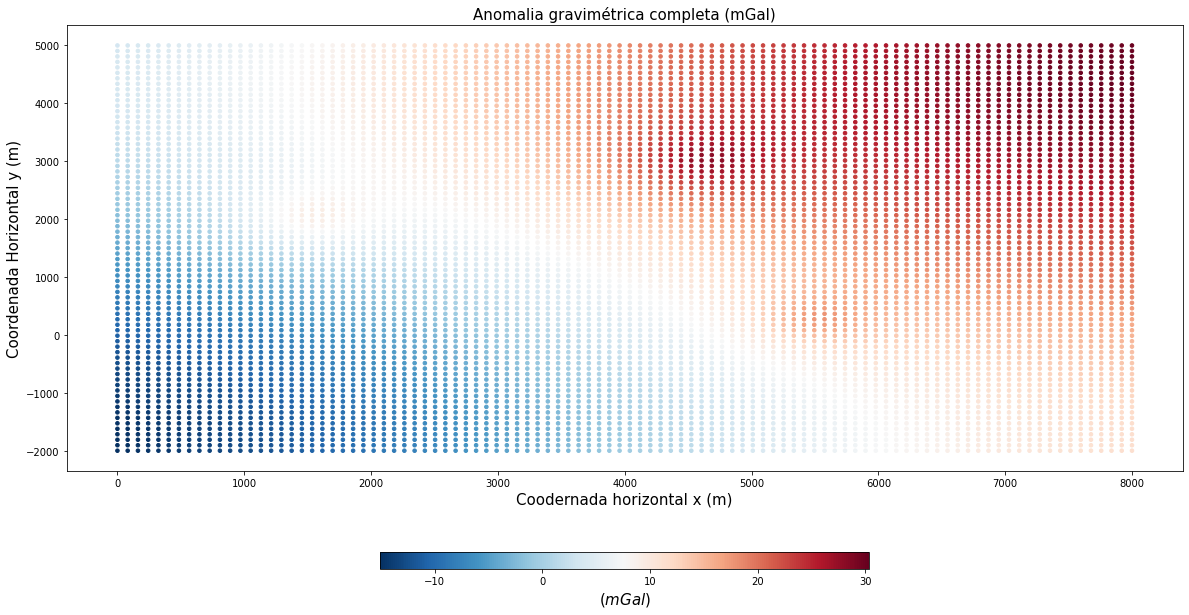

In [ ]:
# criacao do ambiente de figura:
fig = plt.figure(figsize=(20,10), facecolor='w')

# titulo na figura: 
plt.title('Anomalia gravimétrica completa (mGal)',fontsize=15)

# nomes aos eixos:
plt.xlabel('Coodernada horizontal x (m)', fontsize = 15)
plt.ylabel('Coordenada Horizontal y (m)', fontsize = 15)

# chamando a funcao que faz o grafico:
p1 = plt.scatter(data.x, data.y, s=50.0, c=data.grav_anom, marker='.', cmap='RdBu_r')

# definindo os detalhes sobre a barra de cores:
cbar = plt.colorbar(p1, aspect=30, fraction = 0.03, orientation="horizontal")
cbar.set_label('$ (mGal) $',fontsize=15, rotation = 0)

## <center size=3> Etapa 03: Modelo matemático para representar a Anomalia Gravimétrica Regional: 
> ### Hipótese utilizada neste caso: O dado regional (produzido por grandes estruturas e em maiores profundidades) pode ser representado pela seguinte equação: 
> ### $ f(x,y) = m_1 + m_2 x + m_3 y + m_4 x^2 + m_5 y^2 + m_6 x^3 + m_7 y^3 + ... $   <br>
> ### A escolha pelo grau do polinômio a ser utilizado é realizado pelo usuário, baseando-se em observação da região de estudo (conhecimento geológico prévio) e também pela análise das proprias tendências presentes nos dados.

In [ ]:
# Acessar os dados armazenados no dataframe data:
xp = data.x         # coordenadas x do dado
yp = data.y         # coordenadas y do dado
gc = data.grav_anom # gravidade completa

## <center size=3> Etapa 04: Precisamos agora encontrar o conjunto de coeficientes do polinômio que melhor descreva a anomalia gravimétrica regional. Como fazer isso??? <br>

### <center> Podemos lançar mão do Método dos mínimos quadrados!  <br>

### Trata-se de um método de ótimização numérica cujo propósito é ajustar uma função a um conjunto de dados. O critério para fazê-lo é a minimização da soma dos quadrados dos resíduos (ou seja, a diferença entre os dados observados e os dados preditos pela função hipótese) Seguindo todas as etapas da formulação matemática do método dos mínimos quadrados, chega-se ao seguinte sistemas de equações normais em sua notação matricial: <br>

##  <center> $\mathbf{G}^T \mathbf{G} \mathbf{m} = \mathbf{G}^T \mathbf{g}_c $,  <br>


### neste caso, $\mathbf{m}$ é o conjunto de coeficientes do polinômio, $\mathbf{g}_c$ é o vetor com a anomalia gravimétrica completa, $\mathbf{G}$ é chamada de matriz de sensibilidade (N x M) e o símbolo $^T$  refere-se à transposição. Precisamos agora aprender a construir essa bendita matriz.

> ## Vejamos a formulação do problema: Neste momento é a hora de computar a seguinte equação:<br>
# <center size=4>     $ \mathbf{G} = \frac{\partial \mathbf{f}(\mathbf{m})}{\partial m_j} $ <br>

### Escolhendo, por exemplo, um polinômio de grau 3, temos a seguinte etapa a cumprir:
> ### $ f(x,y) = m_1 + m_2 x + m_3 y + m_4 x^2 + m_5 y^2 + m_6 x^3 + m_7 y^3$  <br>
> Temos que derivar $f(x,y)$ com relação aos 7 parâmetros $m_1, m_2, ..., m_7$ da seguinte forma: <br>

> ### <center size=4>  $\frac{\partial \mathbf{f}(\mathbf{m})}{\partial m_1} = 1$ 
> ### <center size=4>  $\frac{\partial \mathbf{f}(\mathbf{m})}{\partial m_2} = x$
> ### <center size=4>  $\frac{\partial \mathbf{f}(\mathbf{m})}{\partial m_3} = y$
> ### <center size=4>  $\frac{\partial \mathbf{f}(\mathbf{m})}{\partial m_4} = x^2$
> ### <center size=4>  $\frac{\partial \mathbf{f}(\mathbf{m})}{\partial m_5} = y^2$
> ### <center size=4>  $\frac{\partial \mathbf{f}(\mathbf{m})}{\partial m_6} = x^3$
> ### <center size=4>  $\frac{\partial \mathbf{f}(\mathbf{m})}{\partial m_7} = y^3$ <br>
    
### Agora resta organizar tudo isso em uma matriz G para finalmente resolver o problema de minimos quadrados lineares.

In [ ]:
# Implementacao da equação acima aqui:
ndat = len(xp)       # numero de dados
one  = np.ones(ndat) # vetor com uns
S = np.array( [ one, xp, yp, xp**2, yp**2, xp**3, yp**3, xp**4, yp**4, xp**5, yp**5, xp**6, yp**6] ) 
# transposta para arrumar a matrix corretamente (python troca linha por coluna para agilizar o armazenamento):
G = S.T
# Numero de dados do problema:
N = np.shape(G)[0]
# Numero de parametros do problema:
M = np.shape(G)[1]
print('numero de dados=', N,'numero de parametros=',M)

numero de dados= 7500 numero de parametros= 13


##  <center> Etapa 5: Agora que ja temos a matriz $\mathbf{G}$ corretamente definida, temos que resolver a equação de mínimos quadrados. Para isso, vamos recorrer ao módulo de algebra linear do Numpy (numpy.linalg). Para mais detalhes, veja o link https://numpy.org/doc/stable/reference/routines.linalg.html#module-numpy.linalg.

>### Vejamos algumas funções importantes do numpy e do numpy.linalg que eventualmente poderemos utilizar:

|   Função | O que faz | Sintaxe |
|----------|-----------|---------|
| 1 - linalg.inv| Calcula a inversa da matriz a | np.linalg.inv(a) |
| 2 - linalg.svd| Decomposição em Valores Singulares da matriz a | np.linalg.svd(a) |
| 3 - linalg.eigvals| Autovalores da matriz a | np.linalg.eigvals(a) |
| 4 - linalg.norm| Cálculo da norma matricial de a | np.linalg.norm(a) |
| 5 - linalg.det| Calcula o determinante de a | np.linalg.svd(a) |
| 6 - linalg.cond| Calcula o número de condicionamento da matriz a | np.linalg.cond(a) |
|7 - linalg.solve| Resolve o sistema linear do tipo Ax=b| np.linalg.solve(A,b)|
| 8) dot  | produto escalar entre os arrays a e b | np.dot(a,b) |
| 9) inner| produto interno entre dois arrays a e b | np.inner(a,b) |
| 10) outer| produto externo entre dois arrays a e b | np.outer(a,b) |
| 11) matmul| produto matricial entre dois arrays a e b |np.matmul(a,b) |
| 12) trace(a)| Calcula o traço da matriz a | np.trace(a) |
| 13) transpose(a)| Calcula a matriz transposta de a | np.transpose(a) |
| 14) eye( n,m )| Constroi a matriz identidade de dimensão n por m | np.eye(n,m) |

> ### Para tratarmos do nosso problema, vamos utilizar o item 7, sabendo que temos que adaptar o nosso problema de mínimos quadrados para a linalg.solve seja utilizada corretamente: 

### <center> $\mathbf{A} \rightarrow \mathbf{G}^T\mathbf{G}$ <br>
### <center> $\mathbf{b} \rightarrow \mathbf{G}^T\mathbf{g}_c$ <br> 

### Como podemos fazer operações envolvendo matrizes e vetores? <br>

In [ ]:
# Solucao do sistema linear usando :
A = np.dot(G.T,G)
b = np.dot(G.T,gc)
m = np.linalg.solve( A , b )
print ('vetor de parametros estimados =', m)

vetor de parametros estimados = [-1.15155124e+01  5.33501356e-03  3.97333160e-03 -2.12901526e-06
  4.77482680e-07  8.19753349e-10 -2.58873576e-11 -1.03275312e-13
  1.45839277e-14  1.66884479e-18 -2.43767176e-17  2.65595763e-22
  3.37750110e-21]


## Etapa 6: Cálculo da anomalia gravimétrica regional por meio da relação linear (gr = Gm). Lembre-se de guardar os resultados obtidos no dataframe data para salvar em um arquivo ao final de todas as etapas: 

In [ ]:
# Codigo aqui:
g_reg = np.dot(G,m) 

# Guardar no dataframe os novos dados:
data['Regional'] = g_reg

In [ ]:
# veja se o pandas criou a nova coluna com o dado regional
data

,x,y,grav_anom,Regional
0,0.0,-2000.000,-15.070,-16.115588
1,0.0,-1905.405,-15.071,-16.207618
2,0.0,-1810.811,-15.047,-16.240569
3,0.0,-1716.216,-15.000,-16.221608
4,0.0,-1621.622,-14.930,-16.157127
...,...,...,...,...
7495,8000.0,4621.622,30.375,30.089189
7496,8000.0,4716.216,30.336,30.062981
7497,8000.0,4810.811,30.270,30.064613
7498,8000.0,4905.405,30.179,30.104366


## Etapa 7: Visualização das anomalias gravimétricas completa e regional!

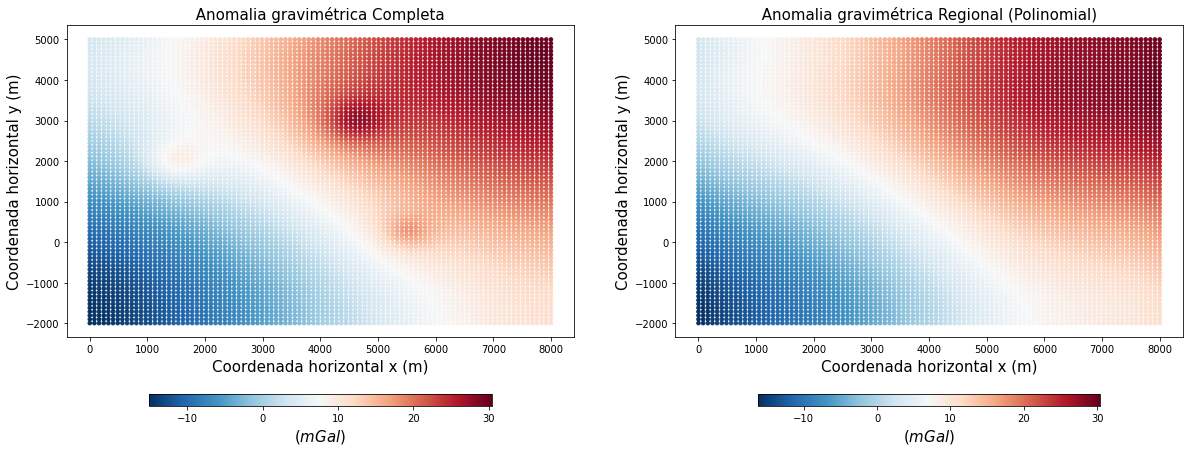

In [ ]:
# Plot residual bouguer anomaly:
plt.close('all')
fig = plt.figure(figsize=(20,7), facecolor='w')

plt.subplot(1,2,1)
plt.title(' Anomalia gravimétrica Completa ',fontsize=15)
plt.xlabel('Coordenada horizontal x (m)', fontsize = 15)
plt.ylabel('Coordenada horizontal y (m)', fontsize = 15)
p1 = plt.scatter(data.x, data.y, s=50.0, c=data.grav_anom, marker='.', cmap='RdBu_r')
cbar = plt.colorbar(p1, aspect=30, fraction = 0.03, orientation="horizontal")
cbar.set_label('$(mGal)$',fontsize=15, rotation = 0)

###########################################################################################################################

plt.subplot(1,2,2)
plt.title(' Anomalia gravimétrica Regional (Polinomial) ',fontsize=15)
plt.xlabel('Coordenada horizontal x (m)', fontsize = 15)
plt.ylabel('Coordenada horizontal y (m)', fontsize = 15)
p1 = plt.scatter(data.x, data.y, s=50.0, c=data.Regional, marker='.', cmap='RdBu_r')
cbar = plt.colorbar(p1, aspect=30, fraction = 0.03, orientation="horizontal")
cbar.set_label('($mGal$)',fontsize=15, rotation = 0)

plt.show()

## Etapa 8: Remoção (subtração) da componente regional para finalmente obter a anomalia gravimétrica "residual":

In [ ]:
# Codigo aqui:
g_res = gc - g_reg

# Guardar no dataframe os novos dados:
data['Residual'] = g_res

In [ ]:
# verifica o dataframe:
data

,x,y,grav_anom,Regional,Residual
0,0.0,-2000.000,-15.070,-16.115588,1.045588
1,0.0,-1905.405,-15.071,-16.207618,1.136618
2,0.0,-1810.811,-15.047,-16.240569,1.193569
3,0.0,-1716.216,-15.000,-16.221608,1.221608
4,0.0,-1621.622,-14.930,-16.157127,1.227127
...,...,...,...,...,...
7495,8000.0,4621.622,30.375,30.089189,0.285811
7496,8000.0,4716.216,30.336,30.062981,0.273019
7497,8000.0,4810.811,30.270,30.064613,0.205387
7498,8000.0,4905.405,30.179,30.104366,0.074634


## Etapa 9: Plot da de todas as etapas (Anomalia completa, regional e residual)

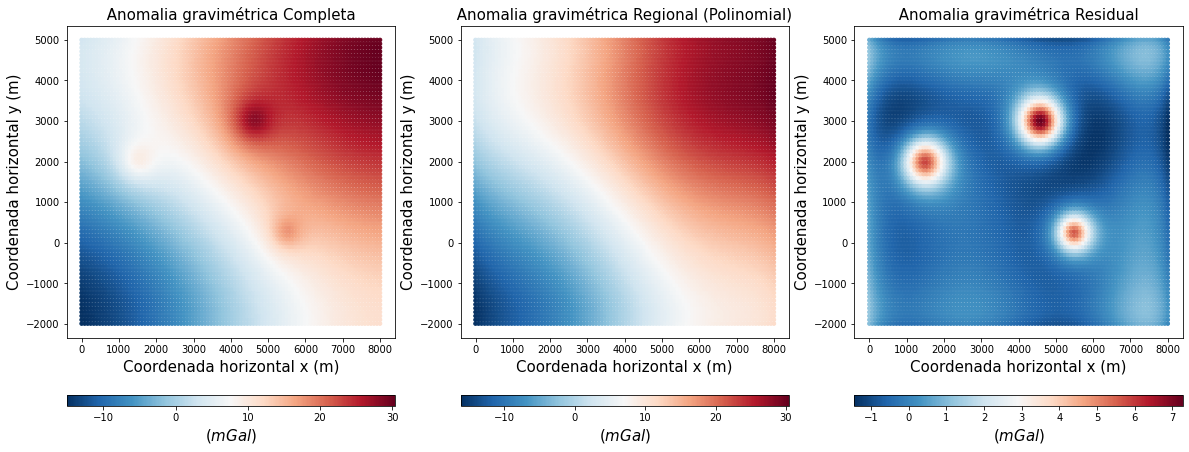

In [ ]:
# Plot residual bouguer anomaly:
plt.close('all')
fig = plt.figure(figsize=(20,7), facecolor='w')

plt.subplot(1,3,1)
plt.title(' Anomalia gravimétrica Completa ',fontsize=15)
plt.xlabel('Coordenada horizontal x (m)', fontsize = 15)
plt.ylabel('Coordenada horizontal y (m)', fontsize = 15)
p1 = plt.scatter(data.x, data.y, s=50.0, c=data.grav_anom, marker='.', cmap='RdBu_r')
cbar = plt.colorbar(p1, aspect=30, fraction = 0.03, orientation="horizontal")
cbar.set_label('$(mGal)$',fontsize=15, rotation = 0)

###########################################################################################################################

plt.subplot(1,3,2)
plt.title(' Anomalia gravimétrica Regional (Polinomial) ',fontsize=15)
plt.xlabel('Coordenada horizontal x (m)', fontsize = 15)
plt.ylabel('Coordenada horizontal y (m)', fontsize = 15)
p1 = plt.scatter(data.x, data.y, s=50.0, c=data.Regional, marker='.', cmap='RdBu_r')
cbar = plt.colorbar(p1, aspect=30, fraction = 0.03, orientation="horizontal")
cbar.set_label('$(mGal)$',fontsize=15, rotation = 0)

###########################################################################################################################

plt.subplot(1,3,3)
plt.title(' Anomalia gravimétrica Residual ',fontsize=15)
plt.xlabel('Coordenada horizontal x (m)', fontsize = 15)
plt.ylabel('Coordenada horizontal y (m)', fontsize = 15)
p1 = plt.scatter(data.x, data.y, s=50.0, c=data.Residual, marker='.', cmap='RdBu_r')
cbar = plt.colorbar(p1, aspect=30, fraction = 0.03, orientation="horizontal")
cbar.set_label('$(mGal)$',fontsize=15, rotation = 0)

plt.show()

## Repare que há três fontes de massa que foram realçadas após o processamento desse dado. Esse é o propósito, fazer com que o sinal produzido por potenciais alvos sejam evidenciados.


## Etapa 10: Salvar o dataframe data em um arquivo:

In [ ]:
# Codigo aqui:

data.to_csv('dados/out.dat',sep=' ', index=False)


## Desafio: E se o grau do polinômio for 6? 10? 100? Fica como exercício testar depois e verificar uma forma de automatizar esse processo!

# <center> !!! **FIM** !!! <br>  MUITO OBRIGADO PELA SUA ATENÇÃO E ESPERO QUE TENHA SIDO INTERESSANTE A ATIVIDADE!